# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('/content/SINASC_RO_2019 V2.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
df = sinasc_raw["munResLat"]
df = df.dropna()
df
df = df.drop_duplicates()

df = df.to_frame()
df.head()

,munResLat
0,-11.93554
3,-12.13178
6,-11.70974
21,-11.72226
43,-11.91439


In [4]:
df[df['munResLat'] > -10.5]

,munResLat
72,-9.90846
73,-9.37819
75,-9.71667
77,-10.26310
83,-10.43595
119,-9.70554
123,-8.76889
125,-10.33887
126,-9.19187
138,-10.20981


In [5]:
# Criar uma coluna para indicar se a latitude é maior ou menor que -10.5:

# Entendendo o código:

# Aqui eu estou discretizando o código criando duas faixas, uma que seja
# maior que - 10.5 e outra que seja menor. Para tanto, eu passo o dataframe
# no qual me baseio e depois, determinido o intervalo, representado pelo parâmetro
# "bin". entre colchetes passo o menor infinito " -float('inf') " até o valor de
# -10.5, assim como o maior infinito "-float('inf')". Posteriormente,
# passo os rótulos que irão compor o índice do dataframe.

df['Latitude'] = pd.cut(df['munResLat'], bins=[-float('inf'), -10.5, float('inf')],
                        labels=['menor que -10.5', 'maior que -10.5'])

# Agrupar por categoria e calcular as estatísticas solicitadas:

df.groupby('Latitude')['munResLat'].agg(['sum', 'mean', 'median',
                                         'max', 'min']).round(2)


,sum,mean,median,max,min
Latitude,,,,,
menor que -10.5,-423.98,-11.78,-11.72,-10.57,-13.50
maior que -10.5,-157.07,-9.82,-9.88,-8.77,-10.44


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
df2 = sinasc_raw["munResArea"]
df2.shape

(27028,)

In [7]:
df2 = df2.dropna()
df2 = df2.drop_duplicates()
df2.shape

(52,)

In [8]:
df2 = df2.to_frame()

In [9]:
df2.head()

,munResArea
0,7067.025
3,3958.273
6,843.446
21,1457.888
43,541.647


In [10]:
# Criar uma coluna para indicar se a área é maior ou menor que 3000:

# Entendendo o código:

# Aqui eu estou discretizando o código criando duas faixas, uma que seja
# maior que 3000 e outra que seja menor. Para tanto, eu passo o dataframe
# no qual me baseio e depois, determinido o intervalo, representado pelo parâmetro
# "bin". entre colchetes passo o menor infinito " -float('inf') " até o valor de
# 3000, assim como o maior infinito "-float('inf')". Posteriormente,
# passo os rótulos que irão compor o índice do dataframe.

df2['Area km²'] = pd.cut(df2['munResArea'], bins=[-float('inf'), 3000, float('inf')],
                        labels=['abaixo de 3000', 'acima de 3000'])

# Agrupar por categoria e calcular as estatísticas solicitadas:

df2.groupby('Area km²')['munResArea'].agg(['sum', 'mean', 'median',
                                         'max', 'min']).round(2)


,sum,mean,median,max,min
Area km²,,,,,
abaixo de 3000,37526.78,1501.07,1451.06,2944.13,459.98
acima de 3000,200063.76,7409.77,5067.38,34096.39,3029.19


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
df3 = sinasc_raw["munResAlt"]
df3.shape

(27028,)

In [12]:
df3 = df3.dropna()
df3 = df3.drop_duplicates()

df3.shape

(49,)

In [13]:
df3 = df3.to_frame()

df3.head()

,munResAlt
0,338.0
3,397.0
6,230.0
21,227.0
43,270.0


In [14]:
# Veificando os dados estatísticos acerca do dataframe
# munResAlt. Para segmentar os dados em duas faixas,
# a partir dos dados, selecionei a média.

df3.describe()

,munResAlt
count,49.000000
mean,210.795918
std,92.288492
min,85.000000
25%,154.000000
50%,191.000000
75%,252.000000
max,595.000000


In [15]:
# Criar uma coluna para indicar se a altitude é maior ou menor que 210.795918:

# Entendendo o código:

# Aqui eu estou discretizando o código criando duas faixas, uma que seja
# maior que 210.795918 e outra que seja menor. Para tanto, eu passo o dataframe
# no qual me baseio e depois, determinido o intervalo, representado pelo parâmetro
# "bin". entre colchetes passo o menor infinito " -float('inf') " até o valor de
# 210.795918, assim como o maior infinito "-float('inf')". Posteriormente,
# passo os rótulos que irão compor o índice do dataframe.

df3['Altitude'] = pd.cut(df3['munResAlt'], bins=[-float('inf'), 210.795918, float('inf')],
                        labels=['abaixo de 210.795918',
                                'acima de 210.795918'])

# Agrupar por categoria e calcular as estatísticas solicitadas:

df3.groupby('Altitude')['munResAlt'].agg(['sum', 'mean', 'median',
                                         'max', 'min']).round(2)


,sum,mean,median,max,min
Altitude,,,,,
abaixo de 210.795918,4494.0,154.97,157.0,206.0,85.0
acima de 210.795918,5835.0,291.75,264.0,595.0,212.0


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [16]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [17]:
df4 = sinasc_raw[["munResNome", "IDADEMAE"]]

df4.head()

,munResNome,IDADEMAE
0,Alta Floresta D'Oeste,19
1,Alta Floresta D'Oeste,29
2,Alta Floresta D'Oeste,37
3,Alto Alegre dos Parecis,30
4,Alta Floresta D'Oeste,30


In [18]:
df4.shape

(27028, 2)

In [19]:
df4 = df4.dropna()
df4 = df4.drop_duplicates()

df4.shape

(1421, 2)

In [20]:
df4.head()

,munResNome,IDADEMAE
0,Alta Floresta D'Oeste,19
1,Alta Floresta D'Oeste,29
2,Alta Floresta D'Oeste,37
3,Alto Alegre dos Parecis,30
4,Alta Floresta D'Oeste,30


In [21]:
# Vendo os municípios presentes no dataframe:

df4["munResNome"].value_counts().to_frame().head()

,munResNome
Porto Velho,35
Cacoal,33
Ji-Paraná,33
Vilhena,32
Ariquemes,32


In [22]:
# Criando o dataframe que relaciona o nome do município
# com a idade média das mães.

media_idade_por_municipio = df4.groupby('munResNome')['IDADEMAE'].mean()
media_idade_por_municipio = media_idade_por_municipio.to_frame().round(2)
media_idade_por_municipio.head()

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,29.07
Alto Alegre dos Parecis,26.58
Alto Paraíso,27.00
Alvorada D'Oeste,28.11
Ariquemes,28.50


Text(0.5, 0, 'Nome dos municípios')

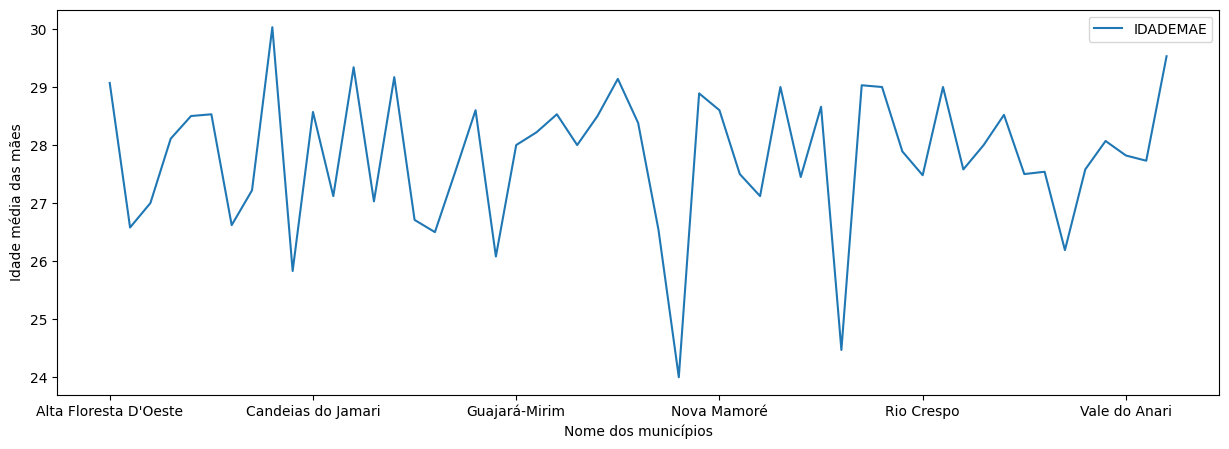

In [23]:
# Criando o gráfico que mensura a idade média
# das mães ao longo do tempo por município.

media_idade_por_municipio.plot(figsize=[15,5])
plt.ylabel("Idade média das mães")
plt.xlabel("Nome dos municípios")

Text(0.5, 0, 'Nome dos municípios')

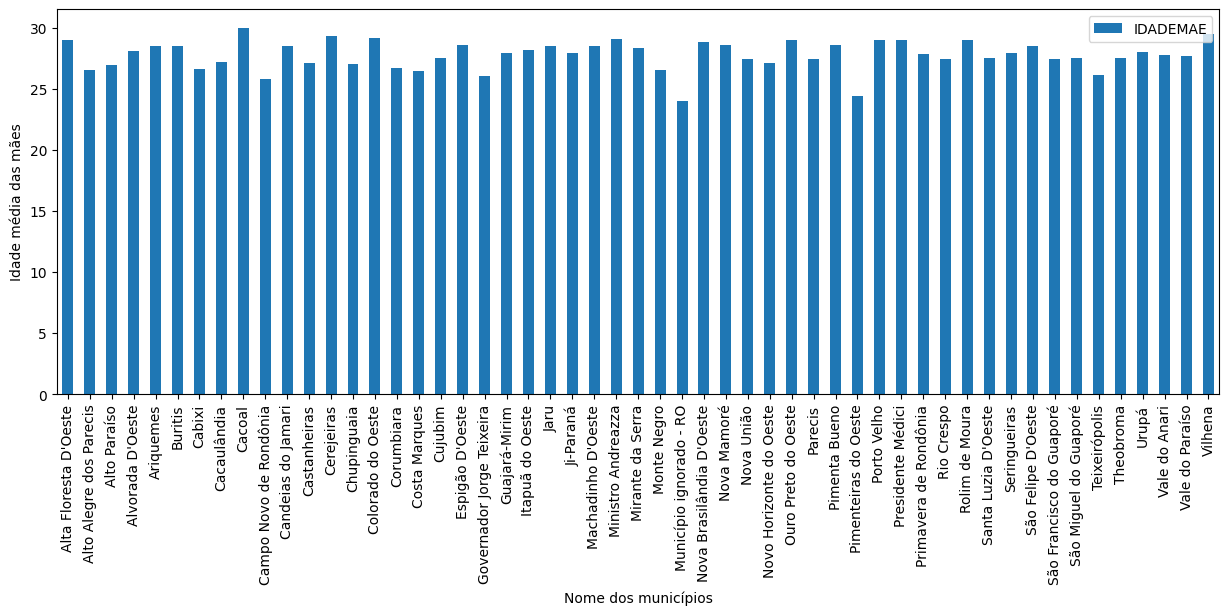

In [24]:
# Criando um gráfico de barras para visualizar
# a idade média das mães por município.

media_idade_por_municipio.plot.bar(figsize=[15,5])
plt.ylabel("Idade média das mães")
plt.xlabel("Nome dos municípios")

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [25]:
mapping = {
    "Candeias do Jamari": "IDH medio",
    "Guajará-Mirim": "IDH medio",
    "Itapuã do Oeste": "IDH medio",
    "Nova Mamoré": "IDH baixo",
    "Porto Velho": "IDH alto",
    "Ariquemes": "IDH alto",
    "Alto Paraíso": "IDH medio",
    "Buritis": "IDH medio",
    "Cacaulândia": "IDH medio",
    "Campo Novo de Rondônia": "IDH baixo",
    "Cujubim": "IDH medio",
    "Monte Negro": "IDH medio",
    "Rio Crespo": "IDH medio",
    "Jaru": "IDH medio",
    "Governador Jorge Teixeira": "IDH baixo",
    "Machadinho D'Oeste": "IDH baixo",
    "Theobroma": "IDH baixo",
    "Vale do Anari": "IDH baixo",
    "Alvorada D'Oeste": "IDH medio",
    "Costa Marques": "IDH medio",
    "Ji-Paraná": "IDH alto",
    "Mirante da Serra": "IDH medio",
    "Nova União": "IDH baixo",
    "Ouro Preto do Oeste": "IDH medio",
    "Presidente Médici": "IDH medio",
    "São Francisco do Guaporé": "IDH medio",
    "São Miguel do Guaporé": "IDH medio",
    "Seringueiras": "IDH baixo",
    "Teixeirópolis": "IDH medio",
    "Urupá": "IDH medio",
    "Vale do Paraíso": "IDH medio",
    "Cacoal": "IDH alto",
    "Alta Floresta D'Oeste": "IDH medio",
    "Alto Alegre dos Parecis": "IDH baixo",
    "Castanheiras": "IDH medio",
    "Espigão D'Oeste": "IDH medio",
    "Ministro Andreazza": "IDH medio",
    "Nova Brasilândia D'Oeste":"IDH medio",
    "Novo Horizonte do Oeste": "IDH medio",
    "Parecis": "IDH medio",
    "Pimenta Bueno": "IDH alto",
    "Primavera de Rondônia": "IDH medio",
    "Rolim de Moura": "IDH alto",
    "Santa Luzia D'Oeste": "IDH medio",
    "São Felipe D'Oeste": "IDH medio",
    "Vilhena": "IDH alto",
    "Cabixi": "IDH medio",
    "Cerejeiras": "IDH medio",
    "Chupinguaia": "IDH medio",
    "Colorado do Oeste": "IDH medio",
    "Corumbiara": "IDH medio",
    "Pimenteiras do Oeste": "IDH medio"
}

In [32]:
# Criar DataFrame a partir do dicionário
df5 = pd.DataFrame(list(mapping.items()), columns=['Municipios', 'IDH'])
df5.head()



,Municipios,IDH
0,Candeias do Jamari,IDH medio
1,Guajará-Mirim,IDH medio
2,Itapuã do Oeste,IDH medio
3,Nova Mamoré,IDH baixo
4,Porto Velho,IDH alto


In [34]:
# Criando um dataframe por meio do groupby()
# no qual eu calculo a quantidade de cada IDH
# no universo total dos municípios.


munIDH = df5.groupby('IDH')["Municipios"].size()
munIDH = munIDH.to_frame()
munIDH


,Municipios
IDH,
IDH alto,7
IDH baixo,9
IDH medio,36


<Axes: xlabel='IDH'>

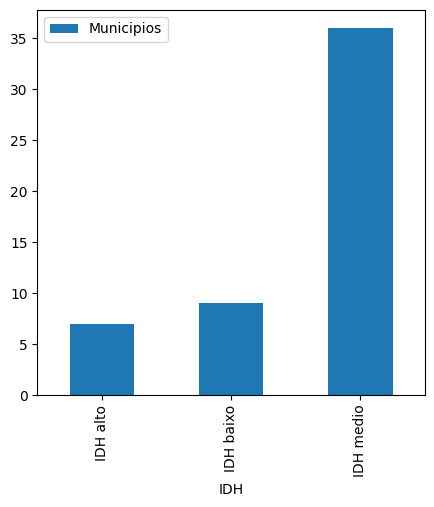

In [37]:
# Criando um gráfico que mensura a quantidade de municípios
# que apresentam IDH's considerados baixo, médio e alto.

munIDH.plot.bar(figsize=(5,5))

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.